# 병합 정렬 실습

- 병합 정렬의 핵심 원리는 분할 정복 방식(Divide and Conquer)
- 문제를 아주 작게 쪼개서 해결한 뒤, 그 해결된 조각들을 다시 합쳐서 최종 결과를 만드는 방식

## 병합 정렬이란?

일단 배열을 끝까지 절반으로 쪼갠 후, 이미 정렬된 작은 조각들을 두 개씩 비교하며 다시 합쳐나가는 정렬 방식

Big O : $O(n \log n)$

![image.png](https://cdn.kastatic.org/ka-perseus-images/ace963383bea8d154f6abd1322a06a73b56b4628.png)

## 병합 정렬 동작 원리

1. **Divide**
- 정렬되지 않은 배열을 더 이상 쪼갤 수 없을 때까지(원소가 1개가 될 때까지) 계속 절반으로 나눔
- 원소가 1개인 배열은 그 자체로 정렬된 상태로 봄

2. **Conquer & Merge**
- 정렬된 작은 단위 조각들을 다시 병합함

- 2.1. 비교하며 합치기
  - 정렬된 두 개의 작은 배열을 합칠 때, 각 배열의 가장 작은 값(첫 번째 값)끼리 비교함

- 2.2. 작은 값 먼저 넣기
  - 두 값 중 더 작은 값을 새로운 큰 배열에 먼저 넣음

- 2.3. 반복
  -  이 비교 과정을 두 배열 중 하나의 원소가 모두 소진될 때까지 반복

- 2.4. 남은 값 붙이기
  - 한쪽 배열이 비면, 나머지 배열에 남아있는 원소들을 새 배열 뒤에 그대로 붙여넣음

이 '분할'과 '병합' 과정을 재귀적으로 반복 시, 전체 배열이 정렬됩

### 실습 1: 다음 영상을 보고, 병합 정렬의 원리 자신의 언어로 정리하기

- https://www.youtube.com/watch?v=XaqR3G_NVoo

(여기에 내용 작성)

### 실습 2 : 다음 코드를 실행해보고, 병합 정렬 원리 이해하기

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_merge_sort(arr, left, right, depth=0):
    if left < right:
        mid = (left + right) // 2
        plot_merge_sort(arr, left, mid, depth + 1)
        plot_merge_sort(arr, mid + 1, right, depth + 1)
        merge(arr, left, mid, right)
        plt.bar(range(len(arr)), arr, color='blue')
        plt.title(f'Depth: {depth}')
        plt.pause(0.5)

def merge(arr, left, mid, right):
    left_half = arr[left:mid + 1]
    right_half = arr[mid + 1:right + 1]
    i = j = 0
    k = left

    while i < len(left_half) and j < len(right_half):
        if left_half[i] <= right_half[j]:
            arr[k] = left_half[i]
            i += 1
        else:
            arr[k] = right_half[j]
            j += 1
        k += 1

    while i < len(left_half):
        arr[k] = left_half[i]
        i += 1
        k += 1

    while j < len(right_half):
        arr[k] = right_half[j]
        j += 1
        k += 1


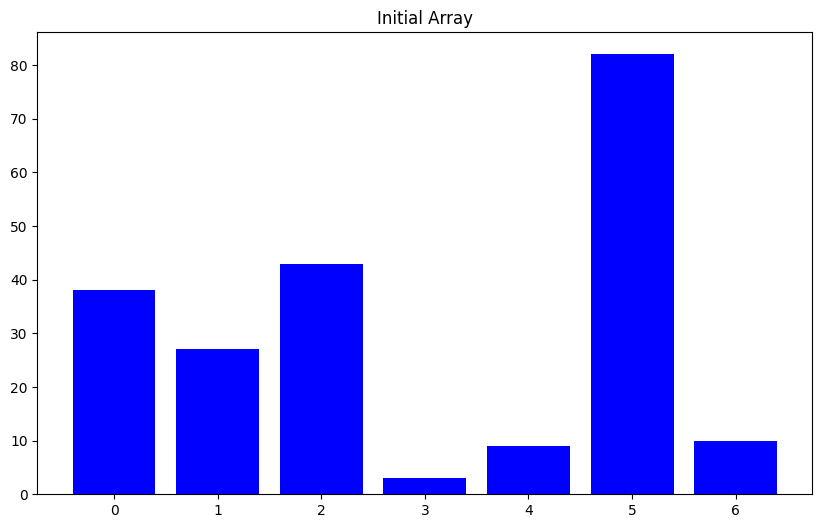

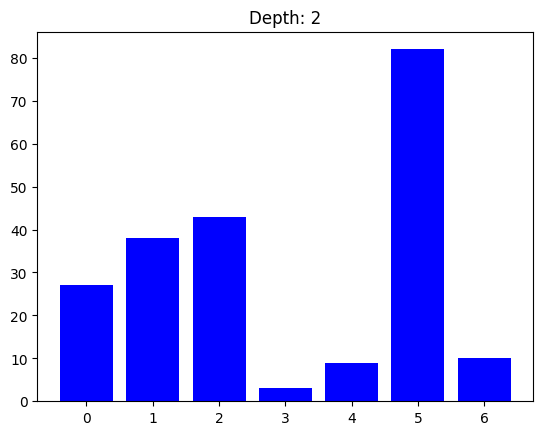

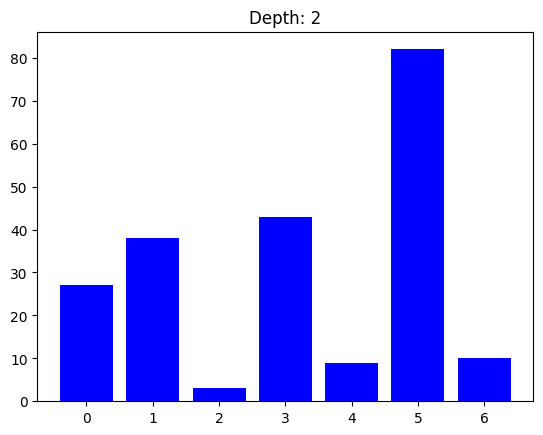

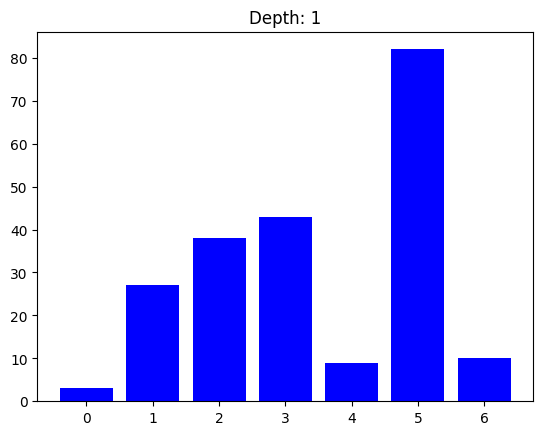

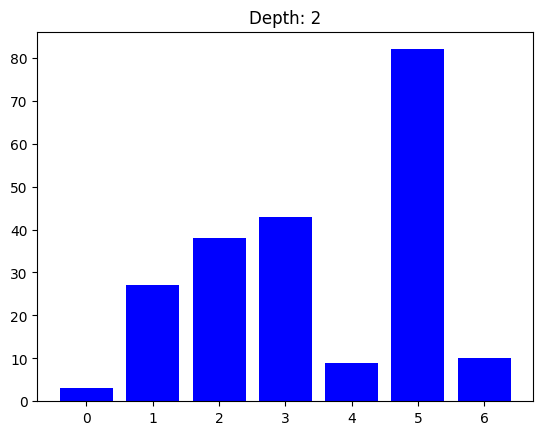

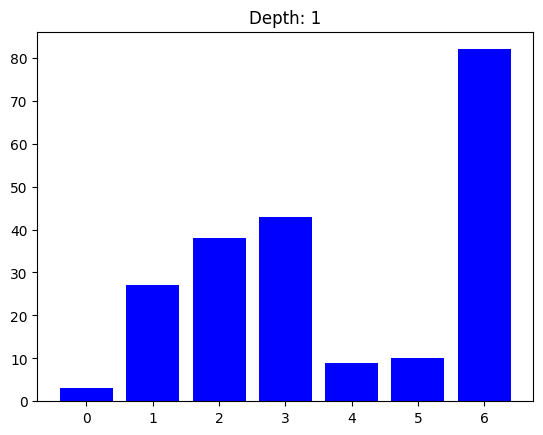

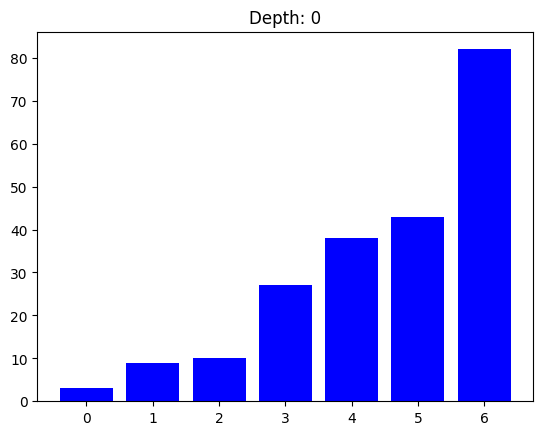

In [ ]:
arr = [38, 27, 43, 3, 9, 82, 10]
plt.figure(figsize=(10, 6))
plt.bar(range(len(arr)), arr, color='blue')
plt.title('Initial Array')
plt.show()
plot_merge_sort(arr, 0, len(arr) - 1)
plt.show()

### 실습 3 : 실제 병합 정렬 구현 코드 확인하고 주석달기

In [ ]:
# 병합 정렬
# 입력: 리스트 a
# 출력: 없음(입력으로 주어진 a가 정렬됨)

def merge_sort(a):
    n = len(a)

    # 종료 조건: 정렬할 리스트의 자료 개수가 한 개 이하이면 정렬할 필요가 없음
    if n <= 1:
        return

    # 그룹을 나누어 각각 병합 정렬을 호출하는 과정
    mid = n // 2  # 중간을 기준으로 두 그룹으로 나눔
    g1 = a[:mid]
    g2 = a[mid:]

    merge_sort(g1)  # 재귀 호출로 첫 번째 그룹을 정렬
    merge_sort(g2)  # 재귀 호출로 두 번째 그룹을 정렬

    # 두 그룹을 하나로 병합

    i1 = 0
    i2 = 0
    ia = 0

    while i1 < len(g1) and i2 < len(g2):
        if g1[i1] < g2[i2]:
            a[ia] = g1[i1]
            i1 += 1
            ia += 1
        else:
            a[ia] = g2[i2]
            i2 += 1
            ia += 1

    # 아직 남아 있는 자료들을 결과에 추가
    while i1 < len(g1):
        a[ia] = g1[i1]
        i1 += 1
        ia += 1

    while i2 < len(g2):
        a[ia] = g2[i2]
        i2 += 1
        ia += 1

d = [6, 8, 3, 9, 10, 1, 2, 4, 7, 5]
merge_sort(d)
print(d)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
